In [3]:
from PIL import Image
import numpy as np
import random as rn
import scipy.stats as ss
import matplotlib.pyplot as plt


In [4]:
def normalize(img_rgb):
    return ss.zscore(img_rgb)


def random_cropping(img_rgb):  # 랜덤 크롭, 임의의 점을 찍고 그 점을 기준으로 +- 165만큼을 고름
    x = rn.randrange(165, img_rgb.shape[0] - 165)
    y = rn.randrange(165, img_rgb.shape[1] - 165)
    cropped = img_rgb[x - 165:x + 166, y - 165:y + 166, :]
    return cropped


def max_G(img_rgb):  # G가 가장 큰 픽셀 찾기
    maxG = np.zeros((img_rgb.shape[0], img_rgb.shape[1]))
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            if (img_rgb[i, j, 1] > img_rgb[i, j, 0] + 0.15 and img_rgb[i, j, 1] > img_rgb[i, j, 2] + 0.15):
                maxG[i, j] = 1

    return maxG


def max_R(img_rgb):  # R이 가장 큰 픽셀 찾기
    maxR = np.zeros((img_rgb.shape[0], img_rgb.shape[1]))
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            if (img_rgb[i, j, 0] > img_rgb[i, j, 1] + 0.15 and img_rgb[i, j, 0] > img_rgb[i, j, 2] + 0.15):
                maxR[i, j] = 1

    return maxR


def cover_rate(img_rgb):  # 피복도 구하기 - 픽셀 중 분류된 값의 비 구함
    nonzero = 0
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            if img_rgb[i, j] != 0:
                nonzero = nonzero + 1
    covered = nonzero / (img_rgb.shape[0] * img_rgb.shape[1])

    return covered

In [17]:
def randomCroppedImage(img_rgb, coverrate, iteration=20):
    i = 0
    image_normalized = normalize(img_rgb)
    best_image = image_normalized
    best_cover_rate = 1.0
    while i < iteration:
        i = i + 1
        print("iter : ", i)
        croppedimg = random_cropping(image_normalized)
        img_R = max_R(croppedimg)
        img_G = max_G(croppedimg)
        cover_rate_rg = cover_rate(img_R) + cover_rate(img_G)
        if cover_rate_rg < coverrate:
            return croppedimg
        elif cover_rate_rg < best_cover_rate:
            best_image = best_image
            best_cover_rate = cover_rate_rg
        else: pass

    return best_image



            # plt.figure(figsize=(20, 4))
            # plt.subplot(141)
            # plt.imshow(croppedimg.astype(np.uint8))
            # plt.subplot(142)
            #
            # plt.imshow(img_R.astype(np.uint8))
            # plt.subplot(143)
            # plt.imshow(img_G.astype(np.uint8))
            # plt.show()

        # print("R 피복도 : ", cover_rate(img_R))
        # print("G 피복도 : ", cover_rate(img_G))
        # print("피복도 : ", cover_rate(img_R) + cover_rate(img_G))

iter :  1
iter :  2
iter :  3
iter :  4
iter :  5
iter :  6
iter :  7
iter :  8
iter :  9
iter :  10
iter :  11
iter :  12
iter :  13
iter :  14


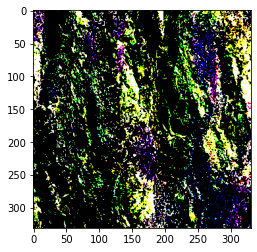

In [20]:
filepath = "./img/2924.jpg"
img_rgb = np.array(Image.open(filepath))

best_crop = randomCroppedImage(img_rgb, 0.1, 20)
plt.figure(figsize=(20, 4))

plt.subplot(143)
plt.imshow(best_crop.astype(np.uint8))
plt.show()